In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews = pd.read_csv(r"C:\Users\ashka\Downloads\reviews.csv")
prices = pd.read_csv(r"C:\Users\ashka\Downloads\prices.csv")
rooms= pd.read_csv(r"C:\Users\ashka\Downloads\room_types.csv")

In [3]:
prices.describe()

,Unnamed: 0,listing_id,price,price_per_month,latitude,longitude
count,25202.000000,2.520200e+04,25202.000000,25202.000000,25202.000000,25202.000000
mean,12604.403579,2.068920e+07,141.817316,4313.610031,40.727145,-73.947975
std,7278.324661,1.103081e+07,147.350650,4481.915598,0.056304,0.050951
min,0.000000,2.595000e+03,10.000000,304.166667,40.506410,-74.244420
25%,6300.250000,1.202115e+07,69.000000,2098.750000,40.687400,-73.982608
50%,12607.500000,2.234547e+07,105.000000,3193.750000,40.721050,-73.953000
75%,18907.750000,3.037697e+07,175.000000,5322.916667,40.762577,-73.929733
max,25208.000000,3.645581e+07,7500.000000,228125.000000,40.913060,-73.712990


In [4]:
prices.isna().sum()

Unnamed: 0         0
listing_id         0
price              0
borough            0
neighbourhood      0
price_per_month    0
latitude           0
longitude          0
dtype: int64

In [5]:
reviews.isna().sum()

Unnamed: 0                        0
listing_id                        0
host_name                         8
last_review                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
booked_days_365                   0
dtype: int64

In [6]:
rooms.isna().sum()

Unnamed: 0      0
listing_id      0
description    10
room_type       0
dtype: int64

In [7]:
print(f"rooms: {len(rooms)}, prices: {len(prices)}, reviews: {len(reviews)}")

rooms: 25209, prices: 25202, reviews: 25209


In [8]:
reviews.iloc[:, 7].head()

0    2
1    1
2    1
3    1
4    4
Name: calculated_host_listings_count, dtype: int64

In [9]:
result = reviews.groupby('host_name').agg({'booked_days_365': 'sum', 'listing_id': 'count'})
result = result.sort_values(by='booked_days_365', ascending=False)
result

,booked_days_365,listing_id
host_name,,
Michael,51080,215
David,40838,197
John,33830,177
Alex,32267,153
Maria,25624,122
...,...,...
Paresh,0,1
Joslyn And Pansy,0,1
Waj,0,1


In [10]:
reviews['host_name'].nunique()

7363

In [11]:
rooms

,Unnamed: 0,listing_id,description,room_type
0,0,2595,Skylit Midtown Castle,entire home/apt
1,1,3831,Cozy Entire Floor of Brownstone,entire home/apt
2,2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,3,5178,Large Furnished Room Near B'way,private room
4,4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt
...,...,...,...,...
25204,25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room
25205,25205,36427429,No.2 with queen size bed,private room
25206,25206,36438336,Seas The Moment,private room
25207,25207,36442252,1B-1B apartment near by Metro,entire home/apt


In [12]:
reviews

,Unnamed: 0,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365
0,0,2595,Jennifer,21/05/2019,1,45,0.38,2,355,10
1,1,3831,LisaRoxanne,05/07/2019,1,270,4.64,1,194,171
2,2,5099,Chris,22/06/2019,3,74,0.59,1,129,236
3,3,5178,Shunichi,24/06/2019,2,430,3.47,1,220,145
4,4,5238,Ben,09/06/2019,1,160,1.33,4,188,177
...,...,...,...,...,...,...,...,...,...,...
25204,25204,36425863,Rusaa,07/07/2019,1,1,1.00,1,147,218
25205,25205,36427429,H Ai,07/07/2019,1,1,1.00,6,339,26
25206,25206,36438336,Ben,07/07/2019,1,1,1.00,1,87,278
25207,25207,36442252,Blaine,07/07/2019,1,2,2.00,1,40,325


In [13]:
reviews['last_review'].describe()

count          25209
unique           190
top       23/06/2019
freq            1413
Name: last_review, dtype: object

In [14]:
prices

,Unnamed: 0,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude
0,0,2595,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377
1,1,3831,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976
2,2,5099,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500
3,3,5178,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493
4,4,5238,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037
...,...,...,...,...,...,...,...,...
25197,25204,36425863,129,Manhattan,Upper East Side,3923.750000,40.78099,-73.95366
25198,25205,36427429,45,Queens,Flushing,1368.750000,40.75104,-73.81459
25199,25206,36438336,235,Staten Island,Great Kills,7147.916667,40.54179,-74.14275
25200,25207,36442252,100,Bronx,Mott Haven,3041.666667,40.80787,-73.92400


In [15]:
price_rev = reviews.merge(prices, on='listing_id')
price_rev.head()

,Unnamed: 0_x,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,Unnamed: 0_y,price,borough,neighbourhood,price_per_month,latitude,longitude
0,0,2595,Jennifer,21/05/2019,1,45,0.38,2,355,10,0,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377
1,1,3831,LisaRoxanne,05/07/2019,1,270,4.64,1,194,171,1,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976
2,2,5099,Chris,22/06/2019,3,74,0.59,1,129,236,2,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500
3,3,5178,Shunichi,24/06/2019,2,430,3.47,1,220,145,3,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493
4,4,5238,Ben,09/06/2019,1,160,1.33,4,188,177,4,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037


In [16]:
fav_hoods = price_rev.groupby('neighbourhood').agg({'booked_days_365': 'sum','number_of_reviews': 'sum'}).sort_values(by='booked_days_365', ascending=False)
fav_hoods

,booked_days_365,number_of_reviews
neighbourhood,,
Williamsburg,468170,73119
Bedford-Stuyvesant,462999,101735
Harlem,320765,67761
Bushwick,279473,47154
Hell's Kitchen,237639,45920
...,...,...
Eastchester,81,152
Richmondtown,65,79
West Farms,55,4


In [17]:
price_hood = price_rev.groupby('neighbourhood').agg({'price': 'mean'}).sort_values(by='price', ascending=False) 
price_hood

,price
neighbourhood,
Sea Gate,805.000000
Tribeca,396.704918
Flatiron District,342.055556
NoHo,335.024390
SoHo,299.162304
...,...
Bull's Head,48.000000
Little Neck,45.000000
Hunts Point,42.750000


In [18]:
prices['price'].mean()

141.81731608602493

In [19]:
prices.groupby('neighbourhood')['price_per_month'].mean().sort_values( ascending=False)

neighbourhood
 Sea Gate             24485.416667
 Tribeca              12066.441257
 Flatiron District    10404.189815
 NoHo                 10190.325204
 SoHo                  9099.520070
                          ...     
 Bull's Head           1460.000000
 Little Neck           1368.750000
 Hunts Point           1300.312500
 Mount Eden            1292.708333
 New Dorp Beach        1155.833333
Name: price_per_month, Length: 216, dtype: float64

In [20]:
prices['neighbourhood'].value_counts()

 Bedford-Stuyvesant    2206
 Williamsburg          1853
 Harlem                1435
 Bushwick              1199
 Hell's Kitchen        1119
                       ... 
 Lighthouse Hill          1
 Co-op City               1
 Little Neck              1
 Howland Hook             1
 Prince's Bay             1
Name: neighbourhood, Length: 216, dtype: int64

In [21]:
df = price_rev.merge(rooms, on='listing_id', how='left')
result = df.groupby(['neighbourhood', 'room_type']).agg({'price': 'mean'}).sort_values(by='price',ascending=False)
result

,,price
neighbourhood,room_type,
Sea Gate,entire home/apt,805.000000
Tribeca,entire home/apt,450.660000
Bayside,entire home/apt,398.909091
Flatiron District,entire home/apt,386.833333
SoHo,entire home/apt,383.834646
...,...,...
Flatlands,shared room,22.000000
Van Nest,shared room,20.000000
Schuylerville,shared room,20.000000


In [22]:
df.groupby('room_type')['price'].mean()

room_type
entire home/apt    197.166667
private room        81.674126
shared room         53.647863
Name: price, dtype: float64

In [23]:
df.groupby(['borough','room_type'])['listing_id'].count()

borough        room_type      
Bronx          entire home/apt     261
               private room        403
               shared room          33
Brooklyn       entire home/apt    5367
               private room       4906
               shared room         187
Manhattan      entire home/apt    6170
               private room       3901
               shared room         251
Queens         entire home/apt    1335
               private room       2009
               shared room         112
Staten Island  entire home/apt     133
               private room        132
               shared room           2
Name: listing_id, dtype: int64

In [24]:
df.groupby('borough')['price'].agg(['min', 'max', 'mean'])

,min,max,mean
borough,,,
Bronx,20,670,79.241033
Brooklyn,10,7500,121.974665
Manhattan,10,5100,184.000678
Queens,10,2600,92.813947
Staten Island,13,300,86.044944


In [25]:
df['revenue'] = df['booked_days_365'] * df['price']
revenue_by_borough = df.groupby('borough')['revenue'].sum()
revenue_by_borough

borough
Bronx              9324180
Brooklyn         279130240
Manhattan        393420567
Queens            58404083
Staten Island      3443919
Name: revenue, dtype: int64

In [26]:
df.groupby(['borough', 'room_type'])['price_per_month'].mean()

borough        room_type      
Bronx          entire home/apt    3665.732759
               private room       1712.239454
               shared room        1004.671717
Brooklyn       entire home/apt    5167.903313
               private room       2210.943233
               shared room        1199.099822
Manhattan      entire home/apt    7239.911062
               private room       3215.005020
               shared room        2219.204847
Queens         entire home/apt    4286.653870
               private room       1938.793761
               shared room        1240.022321
Staten Island  entire home/apt    3551.889098
               private room       1705.176768
               shared room         653.958333
Name: price_per_month, dtype: float64

In [27]:
df_main = df.copy()

In [28]:
df.columns

Index(['Unnamed: 0_x', 'listing_id', 'host_name', 'last_review',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'booked_days_365',
       'Unnamed: 0_y', 'price', 'borough', 'neighbourhood', 'price_per_month',
       'latitude', 'longitude', 'Unnamed: 0', 'description', 'room_type',
       'revenue'],
      dtype='object')

In [29]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns

Index(['listing_id', 'host_name', 'last_review', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'booked_days_365',
       'price', 'borough', 'neighbourhood', 'price_per_month', 'latitude',
       'longitude', 'description', 'room_type', 'revenue'],
      dtype='object')

In [30]:
df.to_csv(r"C:\Users\ashka\Downloads\DA202\Airbnb_NYC_Sample_cleaned.csv", index=False)

In [31]:
result.shape

(489, 1)

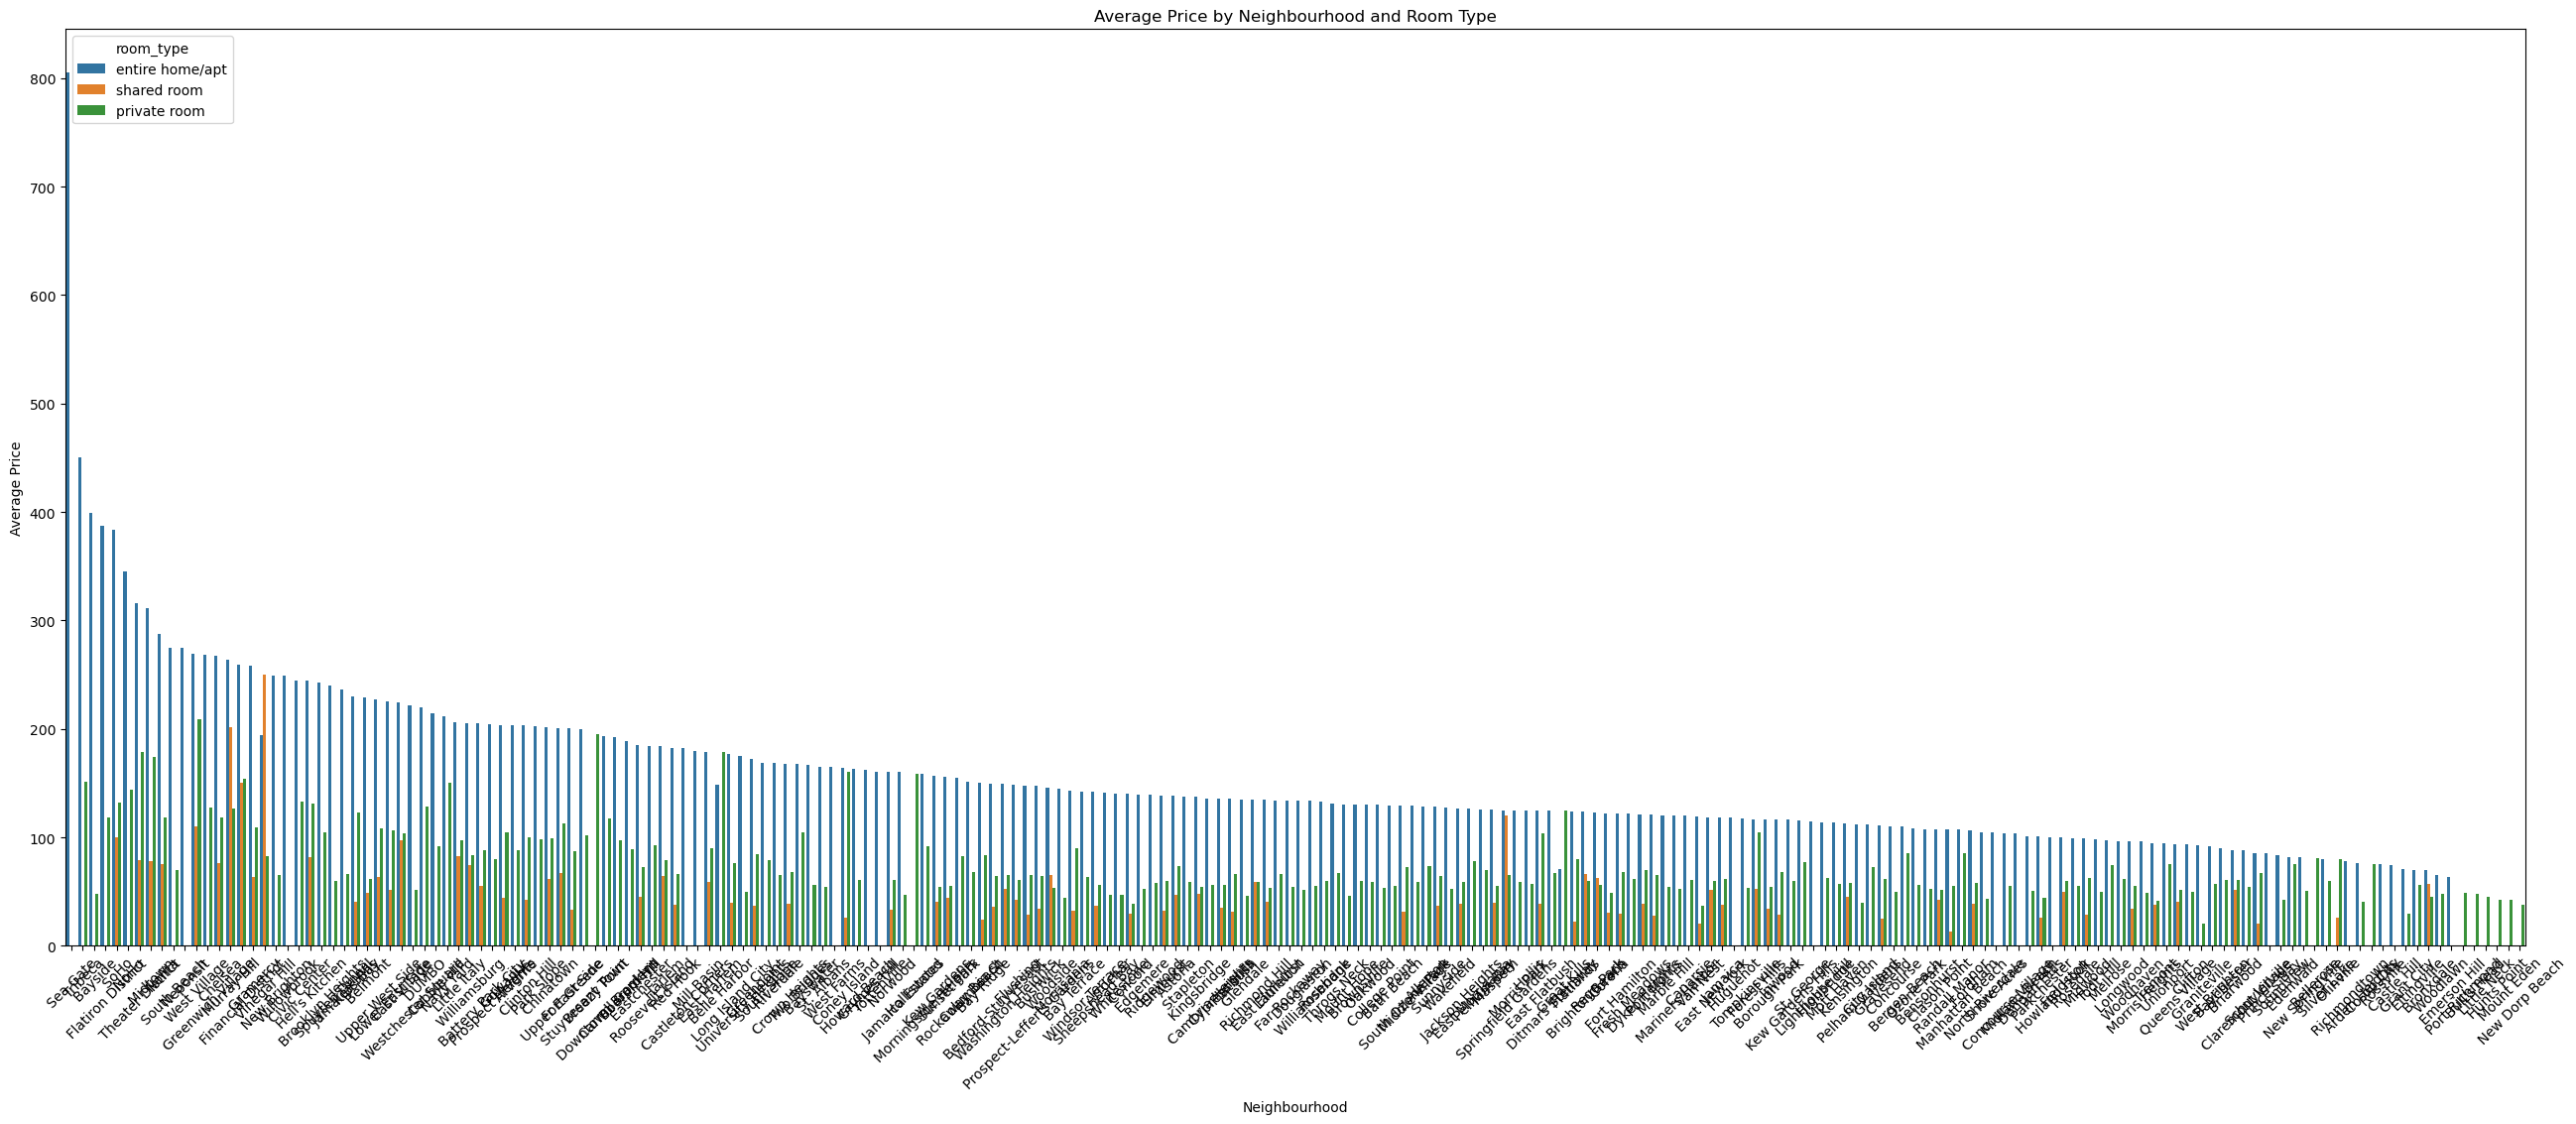

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' is the DataFrame with grouped average prices

# Reset index to convert the MultiIndex to columns
result = result.reset_index()

# Set the figure size
plt.figure(figsize=(32, 12))

# Create the grouped bar plot
sns.barplot(data=result, x='neighbourhood', y='price', hue='room_type')

# Set the title and labels
plt.title('Average Price by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

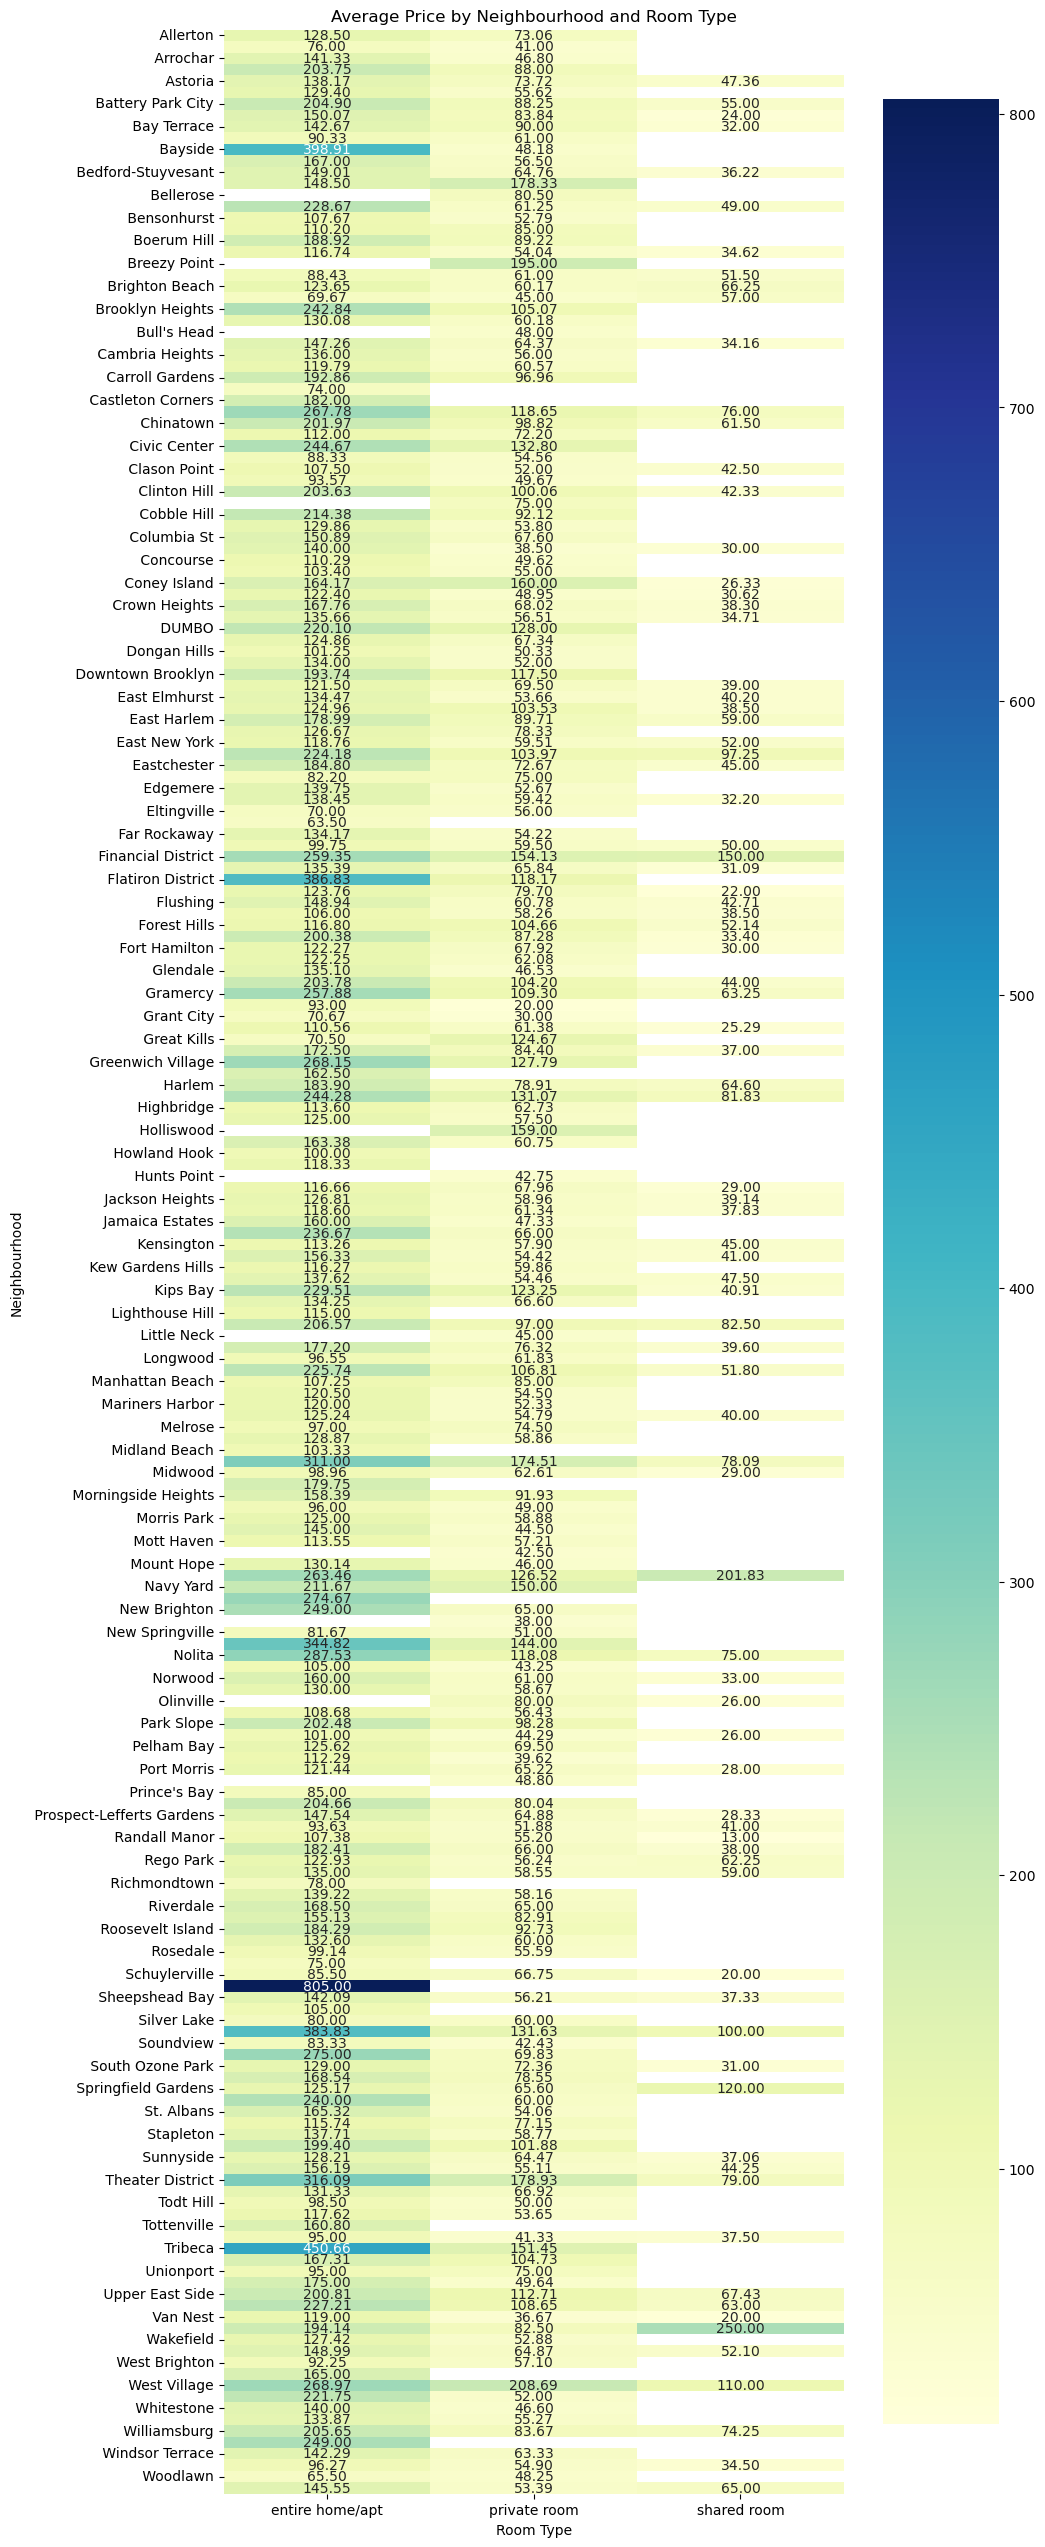

In [33]:
# Assuming 'result' is the DataFrame with grouped average prices

# Pivot the DataFrame to have neighborhoods as rows, room types as columns, and average prices as values
pivot_df = result.pivot(index='neighbourhood', columns='room_type', values='price')

# Set the figure size
plt.figure(figsize=(10, 32))

# Create the heatmap
sns.heatmap(data=pivot_df, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)

# Set the title and labels
plt.title('Average Price by Neighbourhood and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood')

# Rotate y-axis labels if needed
plt.yticks(rotation=0)

# Show the plot
plt.show()


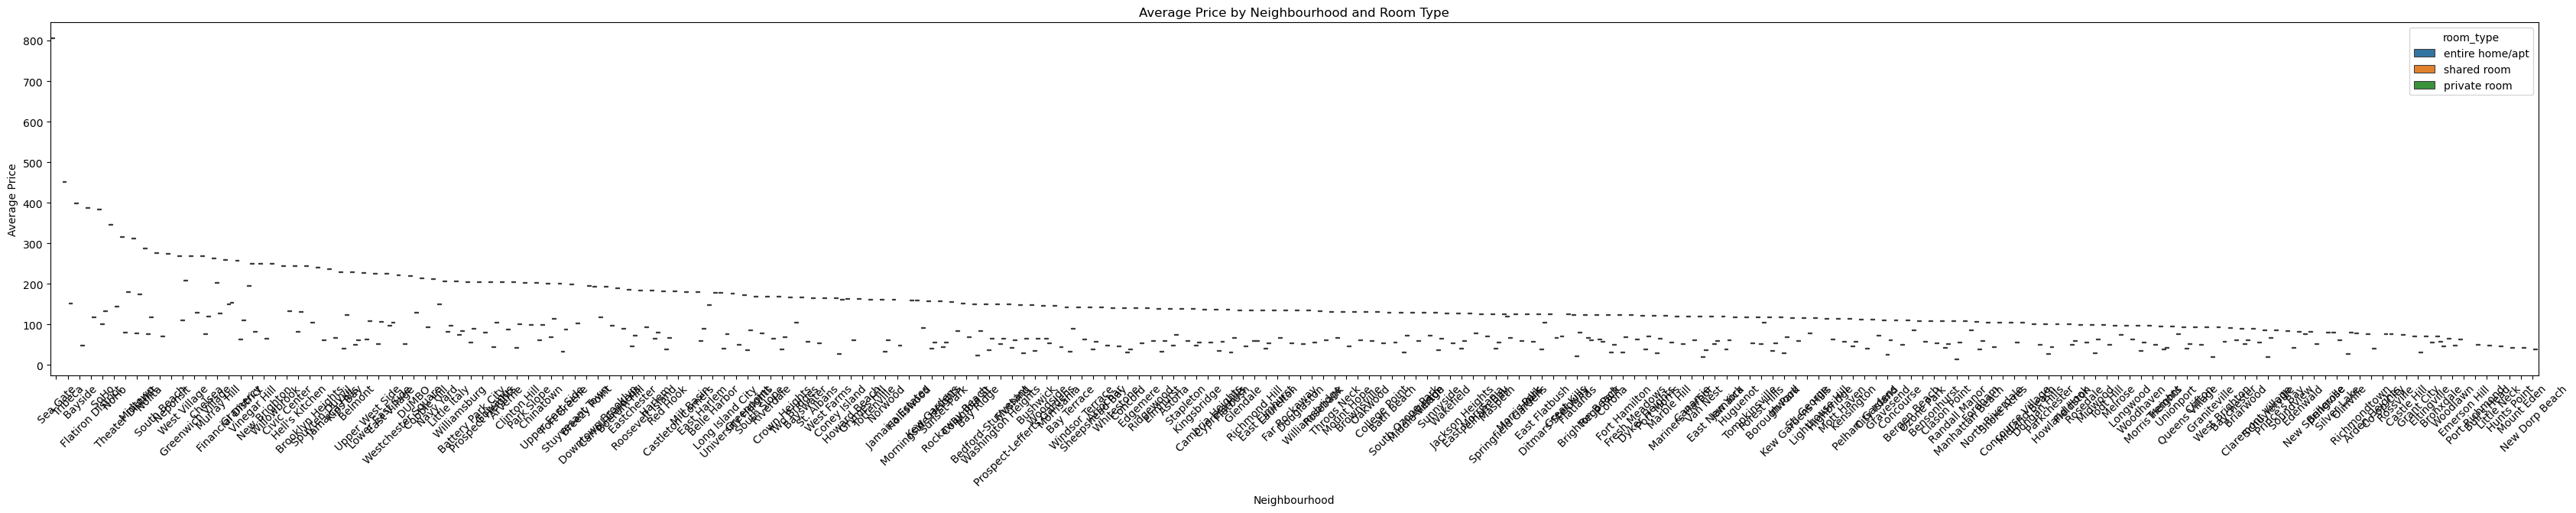

In [34]:
# Set the figure size
plt.figure(figsize=(42, 6))

# Create the grouped box plot
sns.boxplot(data=result, x='neighbourhood', y='price', hue='room_type')

# Set the title and labels
plt.title('Average Price by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [35]:
df.drop(df.columns[[1,11]], axis=1, inplace=True)
df.columns

Index(['listing_id', 'last_review', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'booked_days_365', 'price', 'borough',
       'price_per_month', 'latitude', 'longitude', 'description', 'room_type',
       'revenue'],
      dtype='object')

In [36]:
df.groupby('room_type')['booked_days_365'].count()

room_type
entire home/apt    13266
private room       11351
shared room          585
Name: booked_days_365, dtype: int64

In [37]:
df.groupby('room_type')['availability_365'].count()

room_type
entire home/apt    13266
private room       11351
shared room          585
Name: availability_365, dtype: int64

In [38]:
# Check unique values in 'booked_days_365'
unique_booked_days = df['booked_days_365'].unique()
print(unique_booked_days)

# Check unique values in 'availability_365'
unique_availability = df['availability_365'].unique()
print(unique_availability)

[ 10 171 236 145 177 359 326  51  32 319  44 353 344  18   1  61 132 280
  54 298 110  81   6  96  25 343 269  20  92  56 270 150 100 173 114  63
 225 131 108 335  64  71  45 211 102 134  68 174 293   3  29 277 141  43
  41 233  70 127 156  37 327 339  77  48 158 180 207 356 167 146  23 122
 213 228  19  86 115 258 166  66 345  47  55 152  87 365 349 187  90 202
   0 195 151 117 103  85  58 364  53  75 201 312 239 362 328  12 119 347
  22  39 203 358 118  42 240 274  79 305 307 120  73  14 164 133 107  93
  24 121  36 112 363 309 297   5 289 350 139 354  49 176  78 351 279 104
  34 314 111 262 323 116  67 330 162 360  89 263 294 357 183 286 316 209
 165 259 284 223 186 313 128 161  69  83  91 267 191 142   4  82   2  50
 329  94 226 172 229  88 144 101 129 276 342 143 147 130 246  15 204 338
 198 306 322 340 238  62 250  97 321 300 113 301 254  27   7 334  80 182
 281 105 199  30 275 337  60   9 230  57 136 282  84 212  33 245  40  52
 296  72 361  65 325 248 159 221  28 324  95  59 14

In [39]:
rented_days_count = df.groupby(['room_type', 'borough'])['booked_days_365'].sum()
print(rented_days_count)

available_days_count = df.groupby(['room_type', 'borough'])['availability_365'].sum()
print(available_days_count)

room_type        borough      
entire home/apt  Bronx              47321
                 Brooklyn         1244744
                 Manhattan        1388038
                 Queens            263659
                 Staten Island      22845
private room     Bronx              69777
                 Brooklyn         1084941
                 Manhattan         884324
                 Queens            384652
                 Staten Island      16209
shared room      Bronx               6228
                 Brooklyn           33239
                 Manhattan          46891
                 Queens             15818
                 Staten Island        654
Name: booked_days_365, dtype: int64
room_type        borough      
entire home/apt  Bronx             47944
                 Brooklyn         714211
                 Manhattan        864012
                 Queens           223616
                 Staten Island     25700
private room     Bronx             77318
                 Brooklyn 

In [40]:
available_days_count_room = df.groupby('room_type')['availability_365'].sum()
rented_days_count_room = df.groupby('room_type')['booked_days_365'].sum()
print(available_days_count_room, rented_days_count_room)

room_type
entire home/apt    1875483
private room       1703212
shared room         110695
Name: availability_365, dtype: int64 room_type
entire home/apt    2966607
private room       2439903
shared room         102830
Name: booked_days_365, dtype: int64


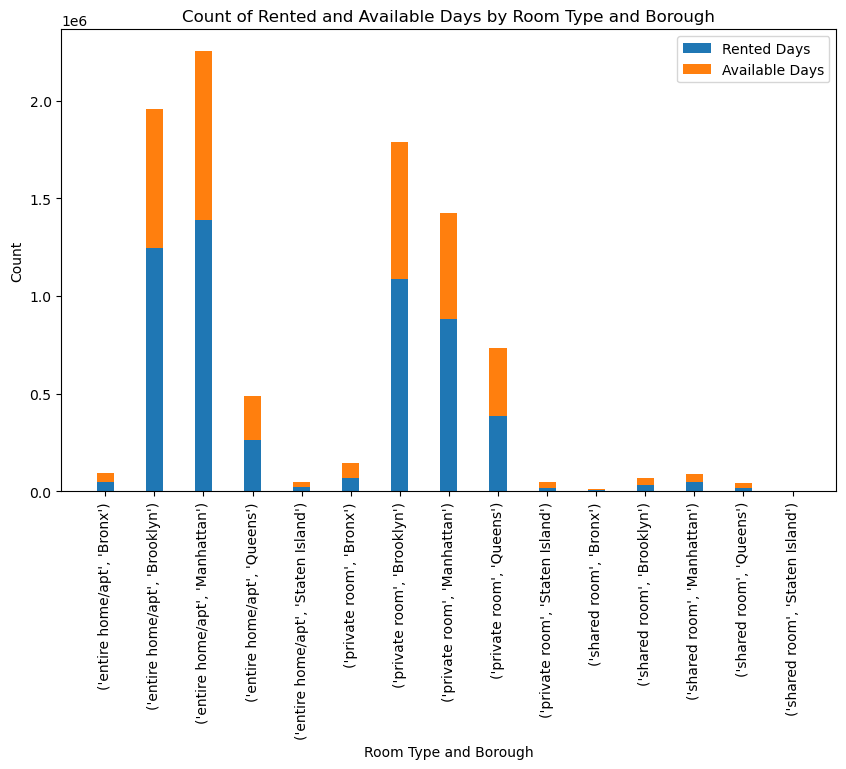

In [41]:
import matplotlib.pyplot as plt

# Select the relevant subset of 'available_days_count' based on the room types and boroughs in 'rented_days_count'
available_days_subset = available_days_count.loc[rented_days_count.index]

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the x-axis labels
x_labels = rented_days_count.index

# Define the positions of the bars
x = range(len(x_labels))
width = 0.35

# Plot the count of rented days
plt.bar(x, rented_days_count, width, label='Rented Days')

# Plot the count of available days
plt.bar(x, available_days_subset, width, bottom=rented_days_count, label='Available Days')

# Set the title and axis labels
plt.title('Count of Rented and Available Days by Room Type and Borough')
plt.xlabel('Room Type and Borough')
plt.ylabel('Count')

# Set the x-axis tick labels
plt.xticks(x, x_labels, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [42]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].describe()

C:\Users\ashka\AppData\Local\Temp\ipykernel_24688\946445218.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['last_review'] = pd.to_datetime(df['last_review'])
C:\Users\ashka\AppData\Local\Temp\ipykernel_24688\946445218.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_review'].describe()


count                   25202
unique                    190
top       2019-06-23 00:00:00
freq                     1412
first     2019-01-01 00:00:00
last      2019-12-06 00:00:00
Name: last_review, dtype: object

In [43]:
start = df['last_review'].min()
end = df['last_review'].max()
print(start, end)

2019-01-01 00:00:00 2019-12-06 00:00:00


In [ ]:
import pandas_profiling

In [ ]:
df.profile_report()

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class 